## 0.0 Intoduction
Research Qs & hypos

Followers vs. Following

H₀: There is no correlation between followers_count and following_count.

H₁: There is a correlation (positive or negative).

Account Age vs. Activity

H₀: The account creation date (created_at) has no effect on statuses_count.

H₁: Older accounts post more statuses.

Featured Tags Usage

H₀: Users with featured_tags have the same average followers as each other.

H₁: Users with tags have significantly different followers from users.

In [110]:
import pandas as pd

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [112]:
orig_url='https://drive.google.com/file/d/1FMDPv2oEoAjcAnXyp9VDQ8O_4a_BgGvV/view?usp=sharing'
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id

user_df = pd.read_csv(
    dwn_url,
    sep=None,
    engine='python',
    on_bad_lines='skip'
)


In [113]:
print("Shape:", user_df.shape)
print("\nColumns:", user_df.columns.tolist())
print("\nPreview:")
display(user_df.head())

Shape: (2849, 9)

Columns: ['user_id', 'username', 'display_name', 'user_type', 'followers_count', 'following_count', 'statuses_count', 'created_at', 'featured_tags']

Preview:


,user_id,username,display_name,user_type,followers_count,following_count,statuses_count,created_at,featured_tags
0,834595,a,黒ヰ樹,user,9223372036854710272,9223372036854710272,9223372036854710272,2019-06-15 00:00:00+00:00,NaN
1,112571114933340703,admin,お :verify:,user,999999999999999999,0,1,2024-06-06 00:00:00+00:00,NaN
2,110042591113828373,a,GatoOscuro 🫂,user,1331,476,885,2023-03-18 00:00:00+00:00,"GNU, gatooscuro, Proyectolibre"
3,111228583255272662,a,Aaron :bc:🖖,user,1063,1368,2275,2023-10-13 00:00:00+00:00,NaN
4,226801,a,殆知阁,user,959,107,310,2017-11-06 00:00:00+00:00,NaN


In [114]:
user_df = user_df.drop_duplicates(subset='username', keep='first')

In [115]:
user_df.head()

,user_id,username,display_name,user_type,followers_count,following_count,statuses_count,created_at,featured_tags
0,834595,a,黒ヰ樹,user,9223372036854710272,9223372036854710272,9223372036854710272,2019-06-15 00:00:00+00:00,NaN
1,112571114933340703,admin,お :verify:,user,999999999999999999,0,1,2024-06-06 00:00:00+00:00,NaN
6,115215643672976578,ADimeSavedblog,A Dime Saved,user,34091,391,55708,2025-09-16 00:00:00+00:00,NaN
9,1002742,atsuko,A,user,616,478,35231,2019-11-16 00:00:00+00:00,NaN
11,114258785027500322,marblenote,A,user,535,955,1,2025-03-31 00:00:00+00:00,NaN


In [116]:
user_df.shape

(2309, 9)

In [117]:
most_followed_user = user_df.sort_values(by='followers_count', ascending=False).iloc[0]
print(most_followed_user)

user_id                               834595
username                                   a
display_name                             黒ヰ樹
user_type                               user
followers_count          9223372036854710272
following_count          9223372036854710272
statuses_count           9223372036854710272
created_at         2019-06-15 00:00:00+00:00
featured_tags                            NaN
Name: 0, dtype: object


In [118]:
user_df['followers_count'].mean()

np.float64(4427618908914957.0)

# **Descriptive statistics**

In [119]:
print("\nDescriptive stats (followers, following, statuses):")
display(user_df[['followers_count','following_count','statuses_count']].describe())


Descriptive stats (followers, following, statuses):


,followers_count,following_count,statuses_count
count,2.309000e+03,2.309000e+03,2.309000e+03
mean,4.427619e+15,3.994531e+15,3.994531e+15
std,1.930613e+17,1.919454e+17,1.919454e+17
min,7.000000e+00,0.000000e+00,0.000000e+00
25%,1.350000e+02,2.200000e+01,1.420000e+02
50%,4.320000e+02,1.060000e+02,9.160000e+02
75%,3.128000e+03,3.860000e+02,4.538000e+03
max,9.223372e+18,9.223372e+18,9.223372e+18


In [120]:
user_df['created_at'] = pd.to_datetime(user_df['created_at'], errors='coerce')

In [121]:
from datetime import datetime, timezone
user_df['account_age_days'] = (datetime.now(timezone.utc) - user_df['created_at']).dt.days

In [122]:
top10 = user_df.sort_values(by='followers_count', ascending=False).head(10)
print("\nTop 10 most followed users:")
display(top10[['username','followers_count','display_name','user_type']])



Top 10 most followed users:


,username,followers_count,display_name,user_type
0,a,9223372036854710272,黒ヰ樹,user
1,admin,999999999999999999,お :verify:,user
105,bob,12345678901,Bob Bobberson,user
83,todd,8000000000,BOFH,user
584,puckipedia,2147480000,hacker witch puck 👩‍💻,user
1564,thenewsdesk,233442134,The News Desk,user
40,actor,168175343,actor 🤖,bot
1036,n,114514815,:salmon::salmon_aburi::salmon_otoro::salmon_ya...,user
331,espn,58670002,ESPN 🤖,bot
1596,ChampionsLeague,53590000,UEFA Champions League 🤖,bot


## Foll

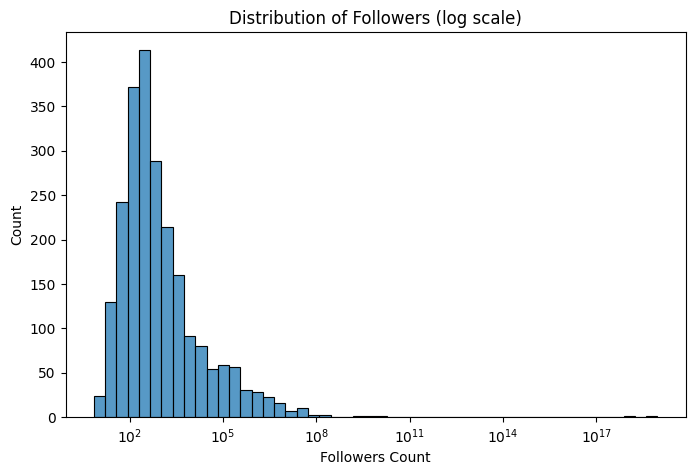

In [123]:

# 8. Distributions
# --------------------------------------------------
# Followers distribution (log scale)
plt.figure(figsize=(8,5))
sns.histplot(user_df['followers_count'], bins=50, log_scale=True)
plt.title("Distribution of Followers (log scale)")
plt.xlabel("Followers Count")
plt.show()


/tmp/ipython-input-4010439676.py:6: UserWarning:

Attempt to set non-positive xlim on a log-scaled axis will be ignored.



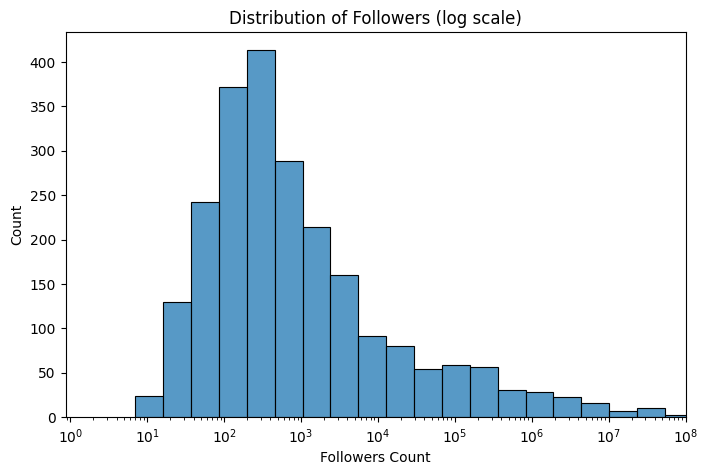

In [124]:
# Followers distribution (log scale) no outliers
plt.figure(figsize=(8,5))
sns.histplot(user_df['followers_count'], bins=50, log_scale=True)
plt.title("Distribution of Followers (log scale)")
plt.xlabel("Followers Count")
plt.xlim(0, 100000000)
plt.show()

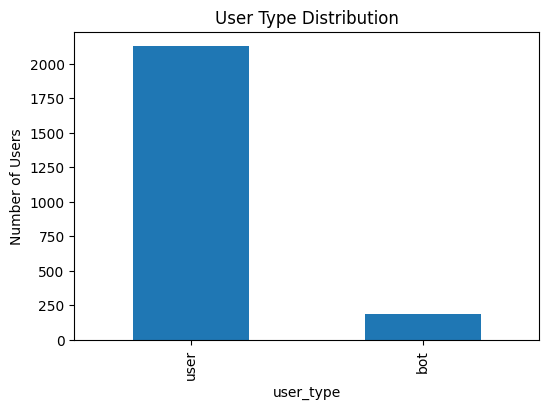

In [125]:

# User type distribution
plt.figure(figsize=(6,4))
user_df['user_type'].value_counts().plot(kind='bar')
plt.title("User Type Distribution")
plt.ylabel("Number of Users")
plt.show()


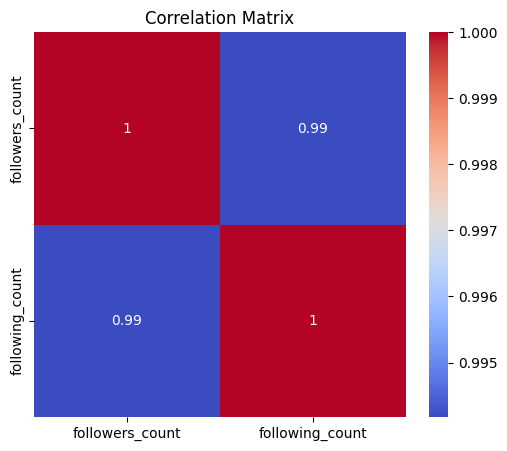

In [126]:

# 9. Correlations between counts
# --------------------------------------------------
plt.figure(figsize=(6,5))
sns.heatmap(user_df[['followers_count','following_count']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


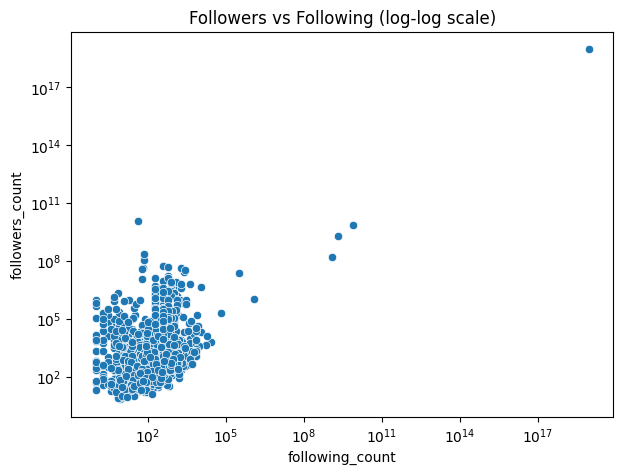

In [127]:

# 10. Followers vs. Following
# --------------------------------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(data=user_df, x='following_count', y='followers_count')
plt.xscale('log')
plt.yscale('log')
plt.title("Followers vs Following (log-log scale)")
plt.show()


/tmp/ipython-input-1956232463.py:6: UserWarning:

Attempt to set non-positive xlim on a log-scaled axis will be ignored.



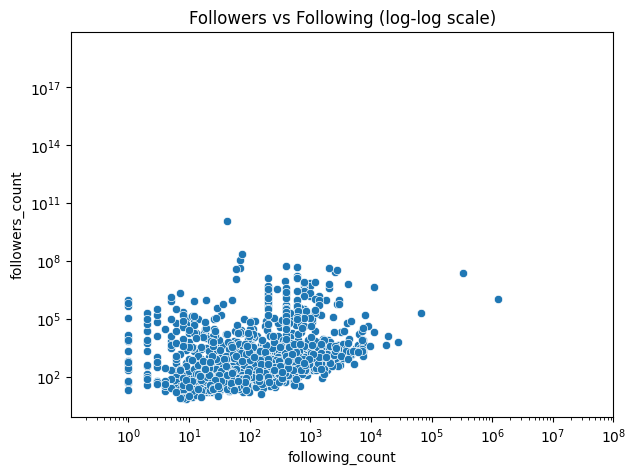

In [128]:
# 10. Followers vs. Following no outliers
# --------------------------------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(data=user_df, x='following_count', y='followers_count')
plt.xscale('log')
plt.xlim(0,100000000)
plt.yscale('log')
plt.title("Followers vs Following (log-log scale)")
plt.show()

In [129]:
user_df['account_age_days'].describe()

,account_age_days
count,2309.000000
mean,1408.710264
std,1407.559059
min,-11006.000000
25%,513.000000
50%,1086.000000
75%,1822.000000
max,15749.000000


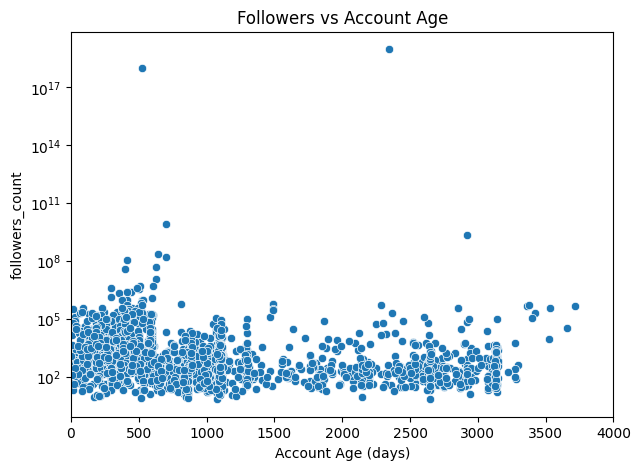

In [130]:

# 11. Followers vs Account Age
# --------------------------------------------------
plt.figure(figsize=(7,5))
sns.scatterplot(data=user_df, x='account_age_days', y='followers_count')
plt.yscale('log')
plt.xlim(0,4000)
plt.title("Followers vs Account Age")
plt.xlabel("Account Age (days)")
plt.show()



Most common featured tags:


,count
featured_tags,
photography,7
retrocomputing,7
music,5
writing,4
mastoart,4
solarpunk,4
lgbtq,4
scifi,4
linux,4


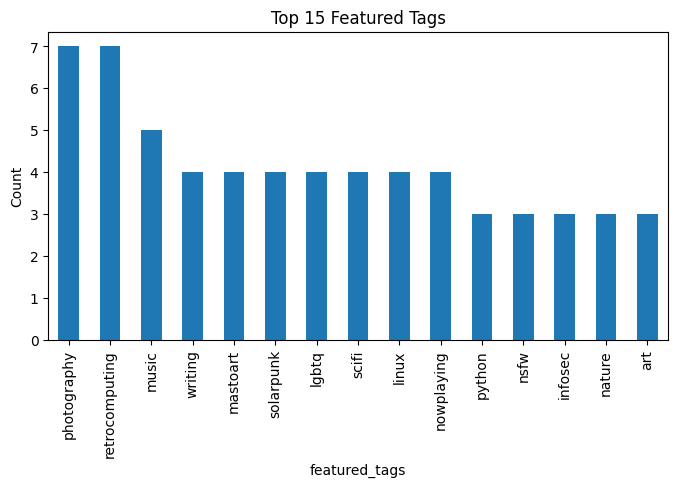

In [131]:

# 12. Featured tags frequency (optional)
# --------------------------------------------------
if 'featured_tags' in user_df.columns:
    tags_series = user_df['featured_tags'].dropna().astype(str).str.split(',').explode().str.strip()
    tag_counts = tags_series.value_counts().head(15)
    print("\nMost common featured tags:")
    display(tag_counts)

    plt.figure(figsize=(8,4))
    tag_counts.plot(kind='bar')
    plt.title("Top 15 Featured Tags")
    plt.ylabel("Count")
    plt.show()


In [132]:
import plotly.express as px

In [133]:


fig = px.scatter(
    user_df,
    x="following_count",
    y="followers_count",
    hover_name="username",
    color="user_type",
    size="statuses_count",
    log_x=True,
    log_y=True,
    range_x=[1, 10_000_000],
    range_y=[1, 10_000_000],
    title="Followers vs Following (log–log interactive)",
)

fig.update_traces(marker=dict(opacity=0.6, size=8, line=dict(width=0)))
fig.update_layout(template="plotly_white")
fig.show()


In [134]:
fig = px.scatter(
    user_df,
    x="account_age_days",
    y="followers_count",
    color="user_type",
    hover_name="username",
    log_x=True,
    log_y=True,
    range_x=[1, filtered_df['account_age_days'].max()],
    range_y=[1, 10_000_000],
    title="Followers vs Account Age (interactive log–log)",
    labels={"account_age_days": "Account Age (days)", "followers_count": "Followers"},
)

fig.update_traces(marker=dict(opacity=0.6, size=8))
fig.update_layout(template="plotly_white")
fig.show()


In [139]:
top10 = user_df.sort_values(by="followers_count", ascending=False).head(10)

fig = px.bar(
    top10,
    x="username",
    y="followers_count",
     log_y=True,
    color="user_type",
    hover_data=["display_name", "following_count", "statuses_count"],
    title="Top 10 Most Followed Users (interactive)",
    text_auto=True,
)

fig.update_layout(template="plotly_white", xaxis_title="Username", yaxis_title="Followers Count")
fig.show()


In [140]:
if "featured_tags" in user_df.columns:
    tags_series = user_df["featured_tags"].dropna().astype(str).str.split(",").explode().str.strip()
    tag_counts = tags_series.value_counts().head(15).reset_index()
    tag_counts.columns = ["tag", "count"]

    fig = px.bar(
        tag_counts,
        x="tag",
        y="count",
        text_auto=True,
        title="Top 15 Featured Tags (interactive)",
    )

    fig.update_layout(template="plotly_white", xaxis_title="Tag", yaxis_title="Count")
    fig.show()
